In [1]:
!pip3 install phik

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


In [2]:
!pip3 install category_encoders

     |████████████████████████████████| 81 kB 1.0 MB/s eta 0:00:011


In [3]:
!pip install scikit-learn==1.1.3

     |████████████████████████████████| 30.8 MB 46 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import phik
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
import category_encoders as ce
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [5]:
contract = pd.read_csv('/datasets/contract_new.csv') 
personal = pd.read_csv('/datasets/personal_new.csv') 
internet = pd.read_csv('/datasets/internet_new.csv') 
phone = pd.read_csv('/datasets/phone_new.csv') 
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.8


## Предварительный анализ

In [6]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [7]:
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [8]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [9]:
contract.info()
contract.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [10]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


<AxesSubplot:>

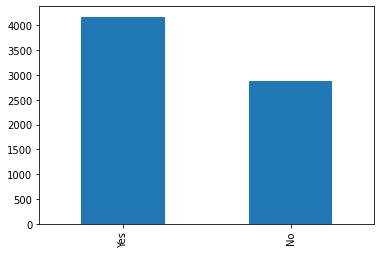

In [13]:
contract['PaperlessBilling'].value_counts().plot(kind='bar')

<AxesSubplot:>

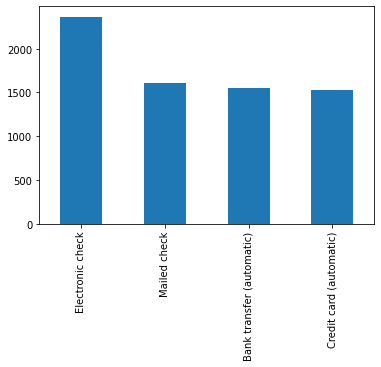

In [14]:
contract['PaymentMethod'].value_counts().plot(kind='bar')

<AxesSubplot:>

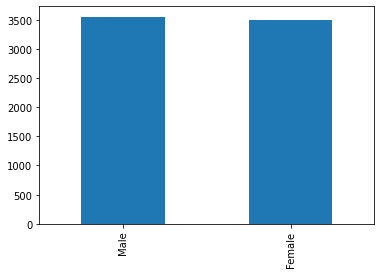

In [15]:
personal['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

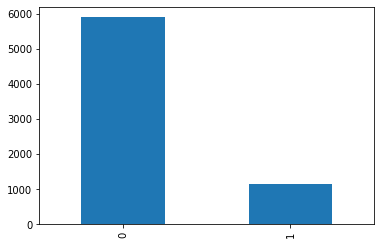

In [16]:
personal['SeniorCitizen'].value_counts().plot(kind='bar')

<AxesSubplot:>

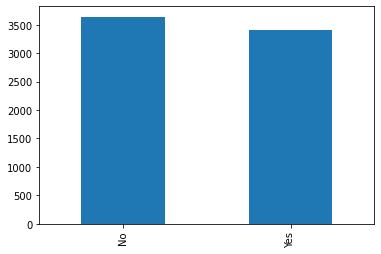

In [17]:
personal['Partner'].value_counts().plot(kind='bar')

<AxesSubplot:>

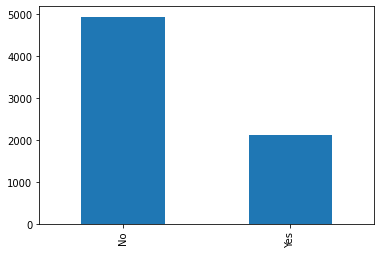

In [18]:
personal['Dependents'].value_counts().plot(kind='bar')

<AxesSubplot:>

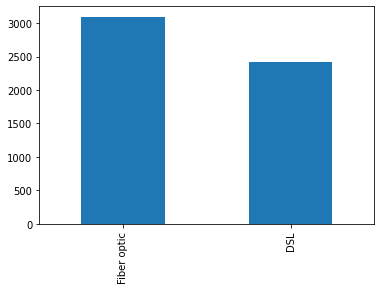

In [19]:
internet['InternetService'].value_counts().plot(kind='bar')

<AxesSubplot:>

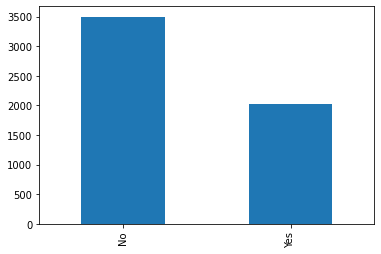

In [20]:
internet['OnlineSecurity'].value_counts().plot(kind='bar')

<AxesSubplot:>

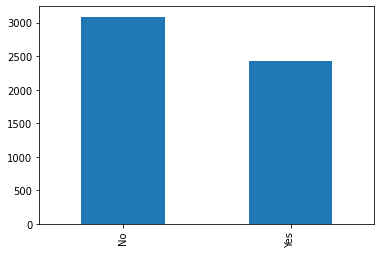

In [21]:
internet['OnlineBackup'].value_counts().plot(kind='bar')

<AxesSubplot:>

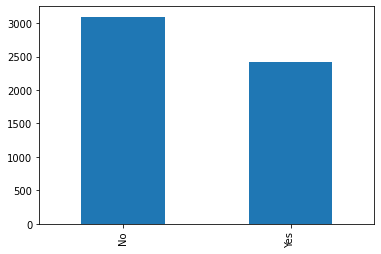

In [22]:
internet['DeviceProtection'].value_counts().plot(kind='bar')

<AxesSubplot:>

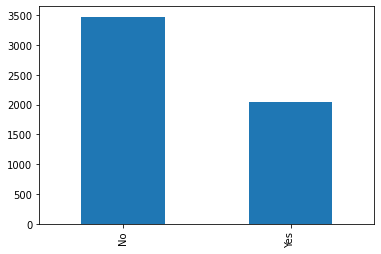

In [23]:
internet['TechSupport'].value_counts().plot(kind='bar')

<AxesSubplot:>

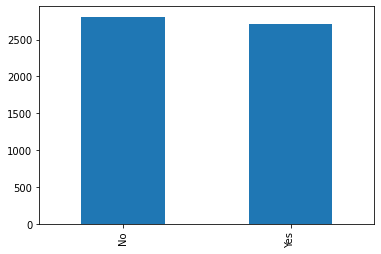

In [24]:
internet['StreamingTV'].value_counts().plot(kind='bar')

<AxesSubplot:>

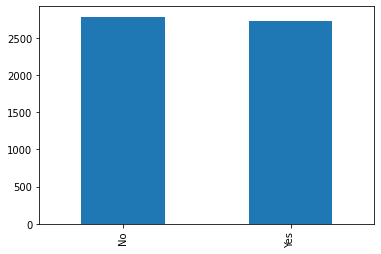

In [25]:
internet['StreamingMovies'].value_counts().plot(kind='bar')

<AxesSubplot:>

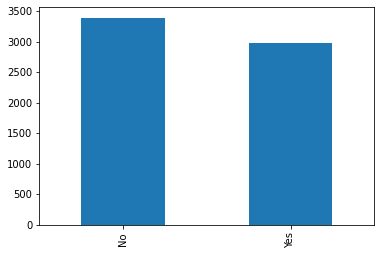

In [26]:
phone['MultipleLines'].value_counts().plot(kind='bar')

In [27]:
contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [28]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [29]:
contract['TotalCharges'].describe()

count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: TotalCharges, dtype: float64

В данных присутствует небольшой дисбаланс, но вполне на допустимом уровне. Некоторые столбцы имеют неверный тип данных, что следует исправить. Также, необходимо объединить все 4 датафрейма в 1, чтобы упростить анализ. В качестве целевого признака подходит 'EndDate'.

### План 

Цель проекта - решить задачу классификации, путем сооздания модели которая будет предсказывать уйдет ли клиент или нет

План:

    1. Предобработка данных (объединение таблиц, приведение некоторых столбцов к нужному типу данных, удаление пропусков, 
    удаление явных дубликатов, выделение целевого признака)
    
    2. Исследование данных (анализ данных, построение графиков)
                              
    3. Подготовка к обучению модели (разбиение на тренировочную и тестовую выборки, кодирование данных)
    
    4. Обучение моделей (обучение 2-3х разных моделей на наших данных, использование кросс-валидации для оценки качества    
    моделей, получение AUC-ROC метрики)
    
    5. Тестирование и выводы (тестирование лучше модели на тестовой выборке и написание отчета о проделанной работе, 
    в случае значения AUC-ROC на тестовой выборке > 0.85)

In [32]:
def col_in_low(column):
    return str.lower('_'.join(re.sub(r"([A-Z])", r" \1", column).split()))

In [33]:
contract.columns = map(col_in_low, contract.columns)
personal.columns = map(col_in_low, personal.columns)
internet.columns = map(col_in_low, internet.columns)
phone.columns = map(col_in_low, phone.columns)

In [34]:
data = contract.merge(personal, how = 'left', on = 'customer_i_d')\
    .merge(internet, how = 'left', on = 'customer_i_d').\
    merge(phone, how = 'left', on = 'customer_i_d')

In [35]:
data

,customer_i_d,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.20,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.40,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.60,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.40,520.80,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [36]:
data['end_date'] = data['end_date'].replace('No', '2020-02-01')

In [37]:
data['target'] = data['end_date'].apply(lambda x: 1 if x != '2020-02-01' else 0)

In [38]:
data.head(20)

,customer_i_d,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,0
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,Female,0,...,No,DSL,Yes,No,No,No,No,No,NaN,0
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,...,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,...,Yes,DSL,Yes,Yes,No,No,No,No,No,1


In [39]:
data['begin_date'] = pd.to_datetime(data['begin_date'], format='%Y-%m-%d')
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d')

In [40]:
data

,customer_i_d,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,target
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,Male,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,0
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,Female,0,...,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,0
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,Female,0,...,Yes,DSL,Yes,No,No,No,No,No,NaN,0
7041,8361-LTMKD,2019-07-01,2020-02-01,Month-to-month,Yes,Mailed check,74.40,520.80,Male,1,...,No,Fiber optic,No,No,No,No,No,No,Yes,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_i_d       7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [42]:
data['usage_time'] = (data['end_date'] - data['begin_date'])
for i in range(len(data['usage_time'])):
     data.loc[i, 'usage_time'] = data.loc[i, 'usage_time'].days

In [43]:
data.isna().sum()

customer_i_d            0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_t_v        1526
streaming_movies     1526
multiple_lines        682
target                  0
usage_time              0
dtype: int64

In [44]:
data['internet_service'].fillna('No', inplace = True)
data['online_security'].fillna('No', inplace = True)
data['online_backup'].fillna('No', inplace = True)
data['device_protection'].fillna('No', inplace = True)
data['tech_support'].fillna('No', inplace = True)
data['streaming_t_v'].fillna('No', inplace = True)
data['streaming_movies'].fillna('No', inplace = True)
data['multiple_lines'].fillna('No', inplace = True)

In [45]:
data.isna().sum()

customer_i_d          0
begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
gender                0
senior_citizen        0
partner               0
dependents            0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_t_v         0
streaming_movies      0
multiple_lines        0
target                0
usage_time            0
dtype: int64

In [46]:
data[data['total_charges'].isna() == True]

,customer_i_d,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,target,usage_time
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,No,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,...,No,No,No,No,No,No,No,No,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,No,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,...,No,No,No,No,No,No,No,No,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,...,No,No,No,No,No,No,No,Yes,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,...,No,No,No,No,No,No,No,No,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,...,No,No,No,No,No,No,No,No,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0,0


In [47]:
data.loc[data['total_charges'].isna() == True, 'total_charges'] = data['monthly_charges']

Пустные строки в "total_charges" можно заменить месячными платежами

In [48]:
data.duplicated().sum()

0

In [49]:
data = data.drop(columns=['begin_date', 'end_date', 'customer_i_d', 'gender'])

Удаляем ненужные столбцы

## Исследовательский анализ

<AxesSubplot:>

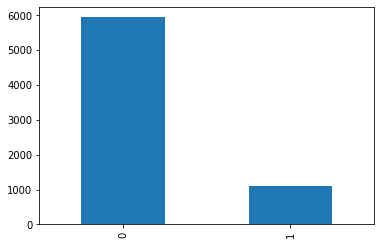

In [50]:
data['target'].value_counts().plot(kind='bar')

In [51]:
data['target'].value_counts()

0    5942
1    1101
Name: target, dtype: int64

В данных наблюдается явный дисбаланс классов

Построим распределение признаков для ушедших и оставшихся клиентов

In [52]:
categorical_col = data.drop(columns=['monthly_charges', 'total_charges', 'usage_time']).columns

In [53]:
data_0 = data[data['target'] == 0]

In [54]:
data_1 = data[data['target'] == 1]

Для категоральных признаков:

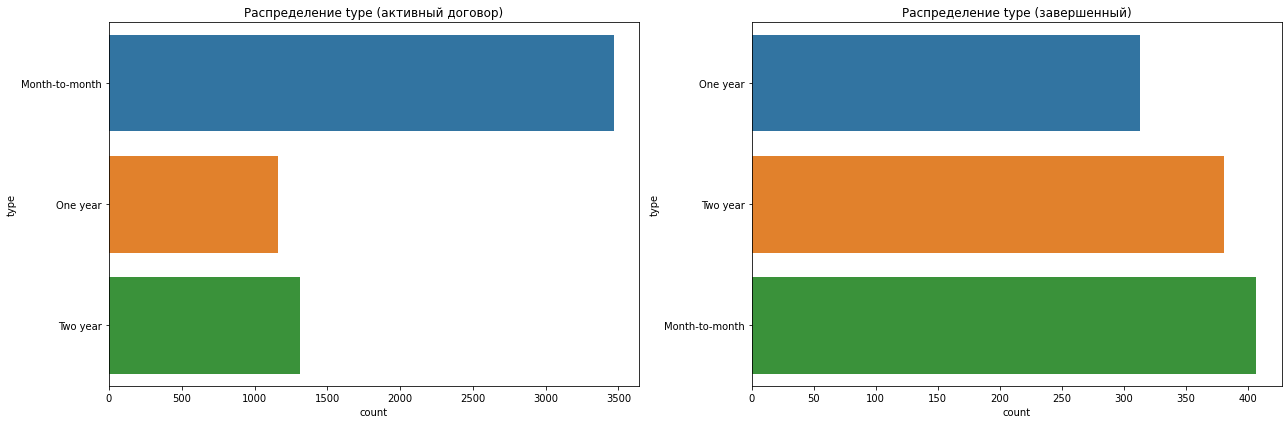

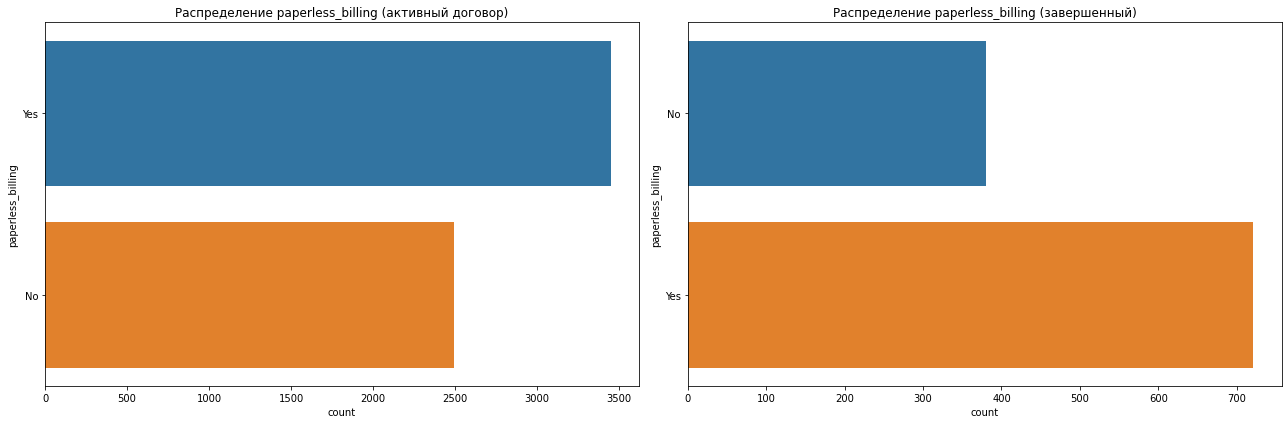

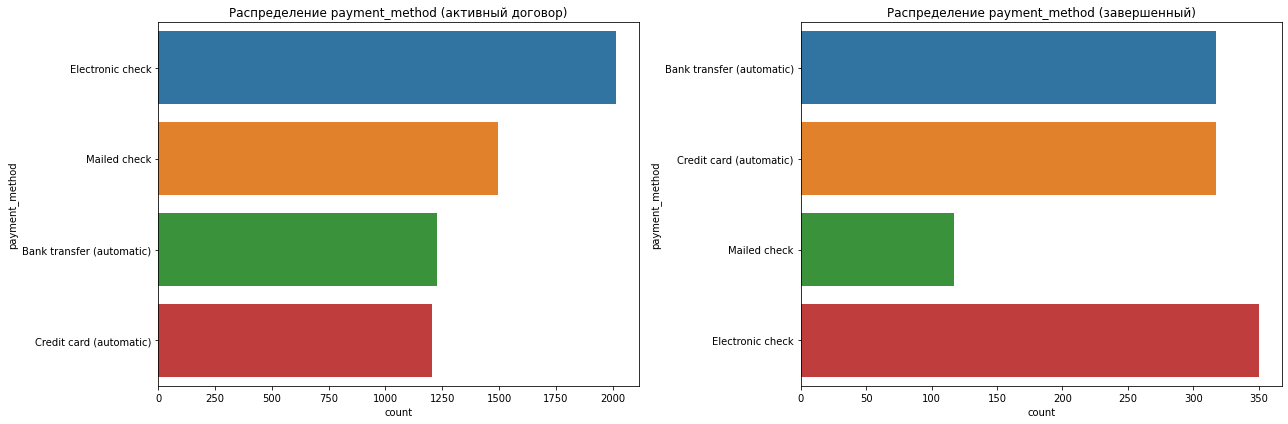

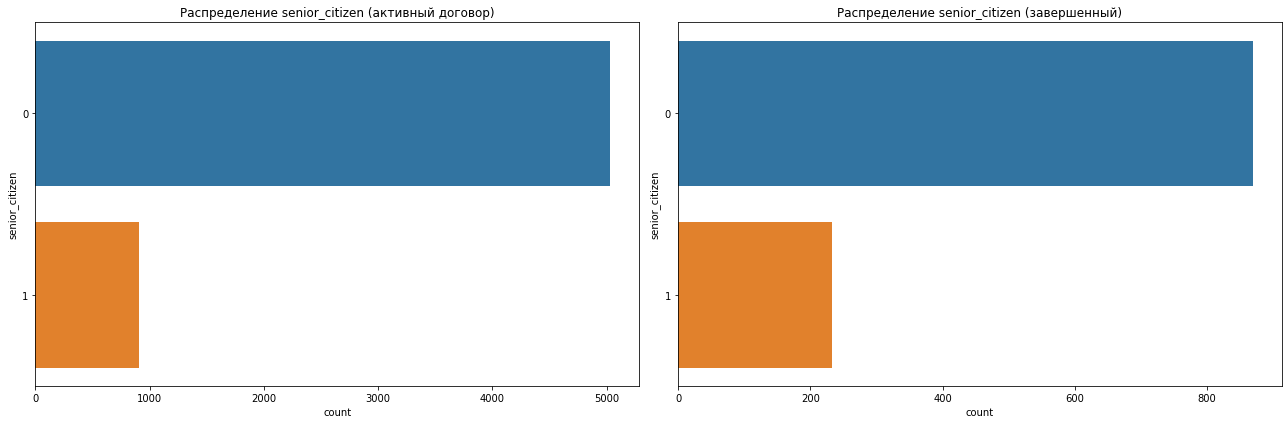

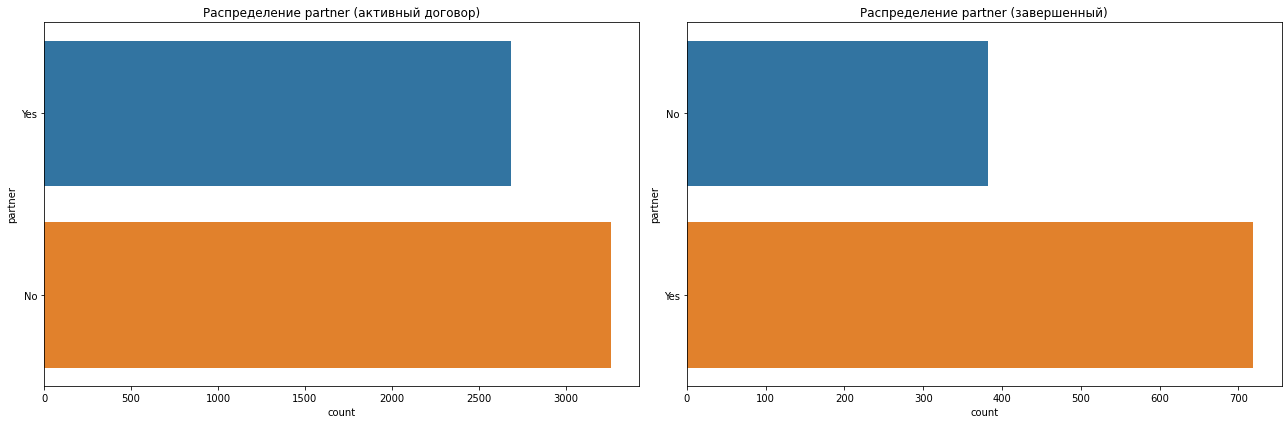

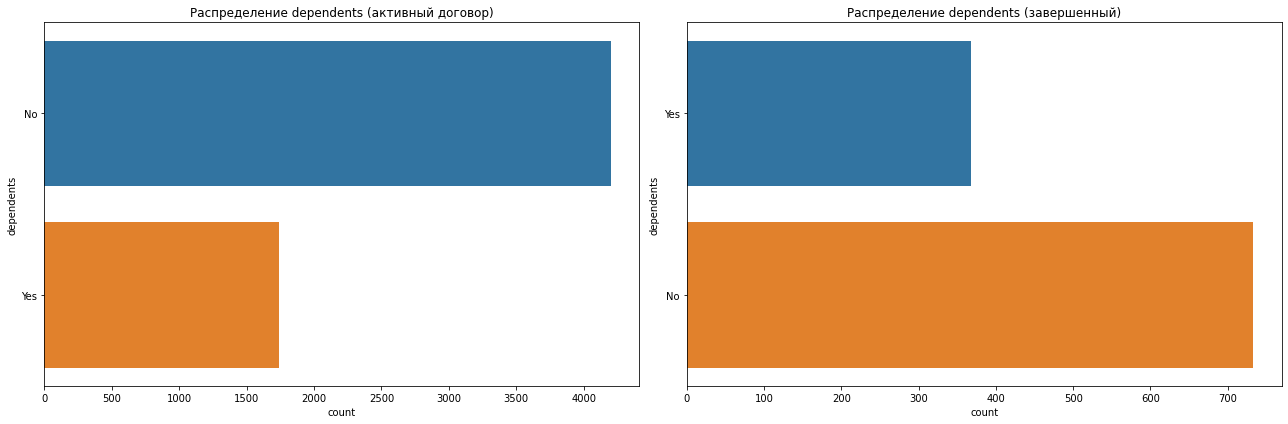

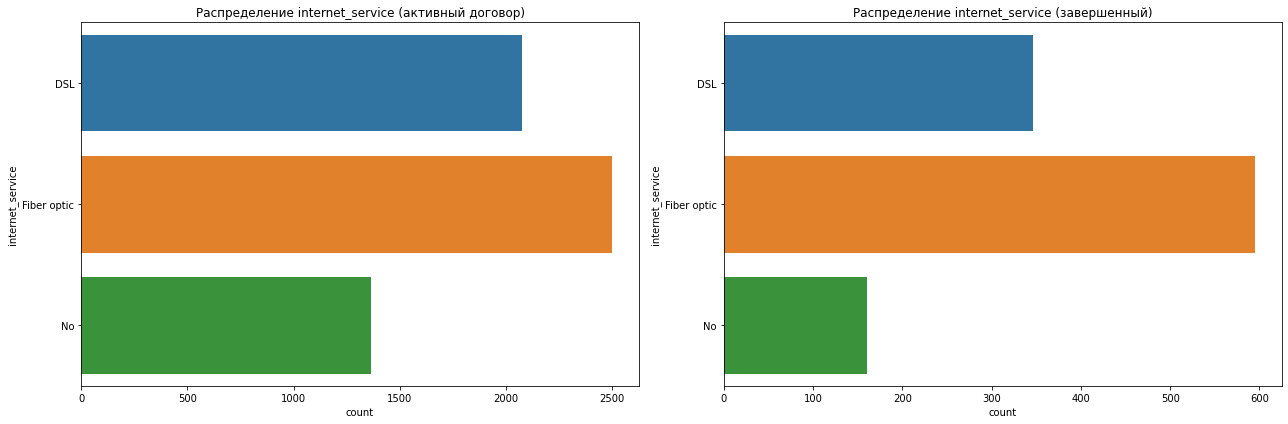

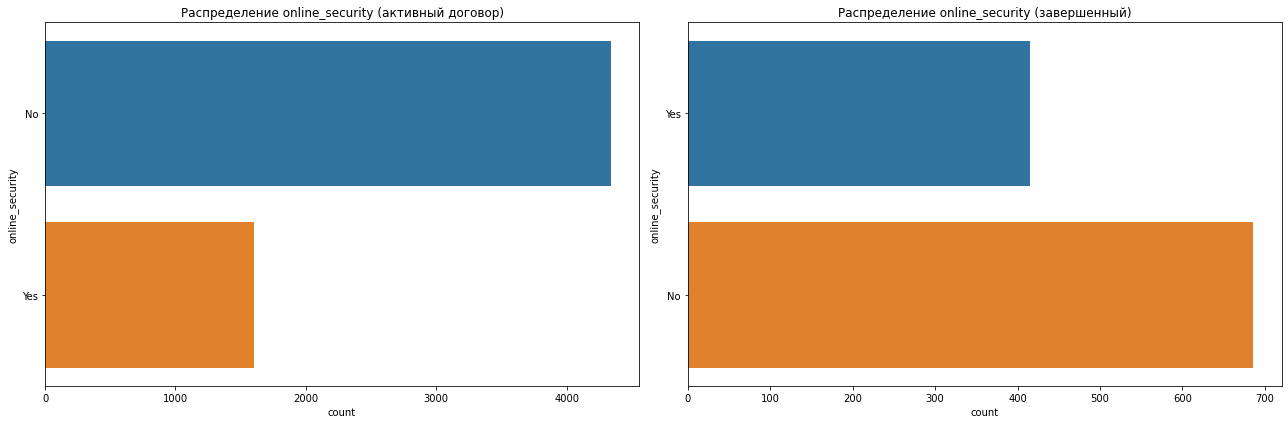

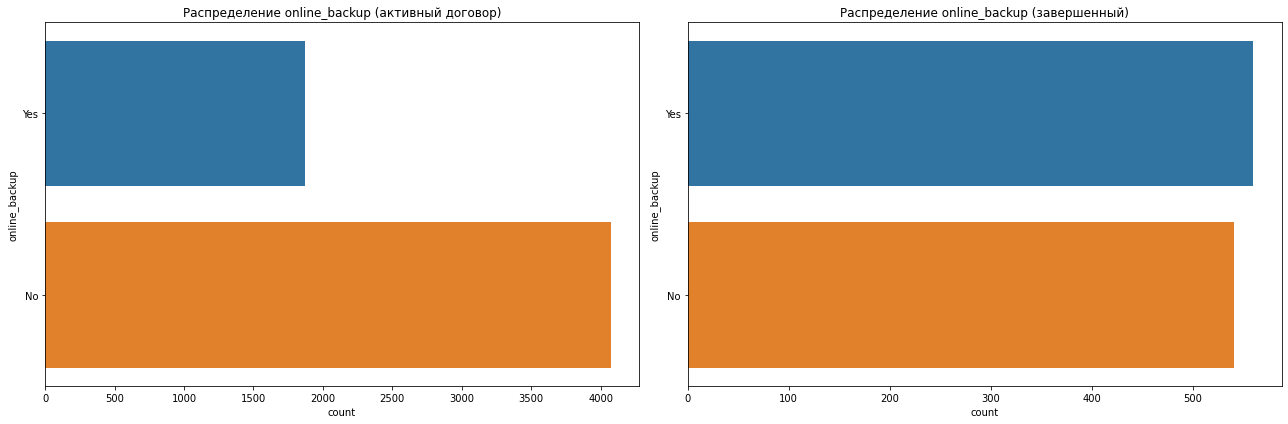

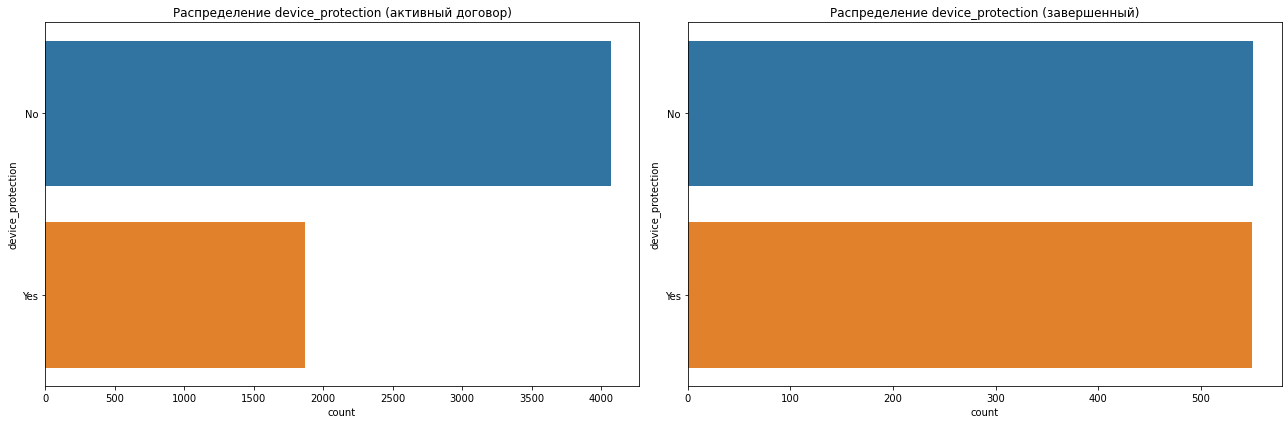

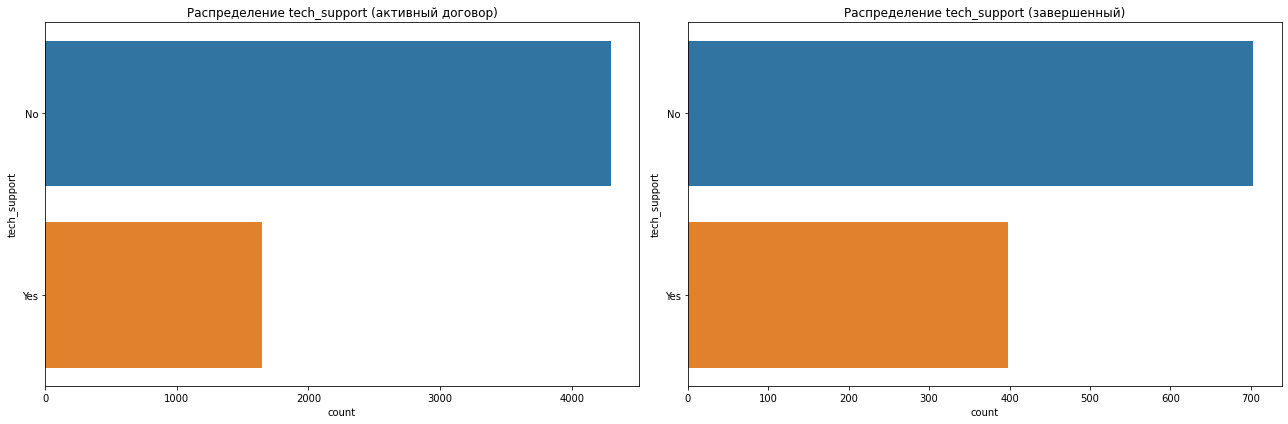

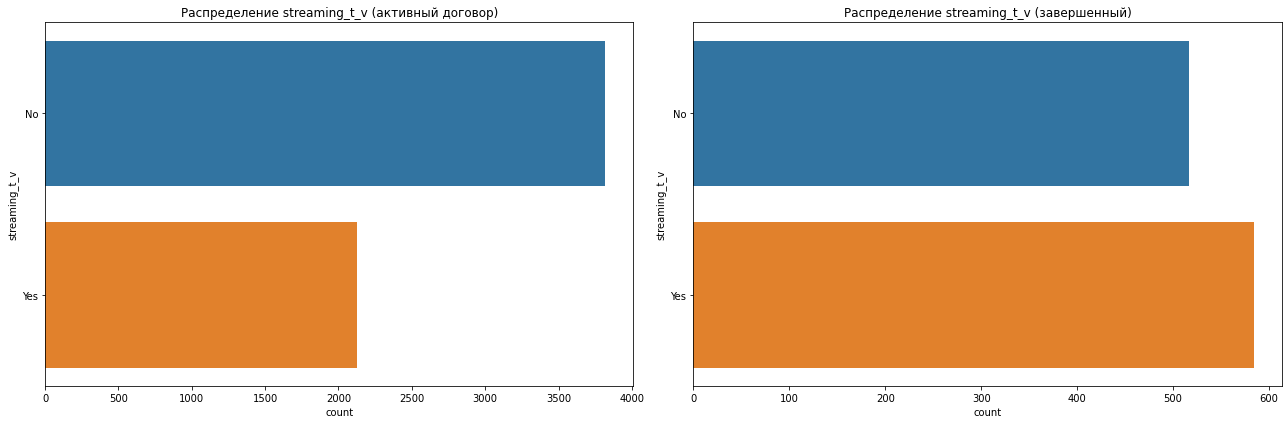

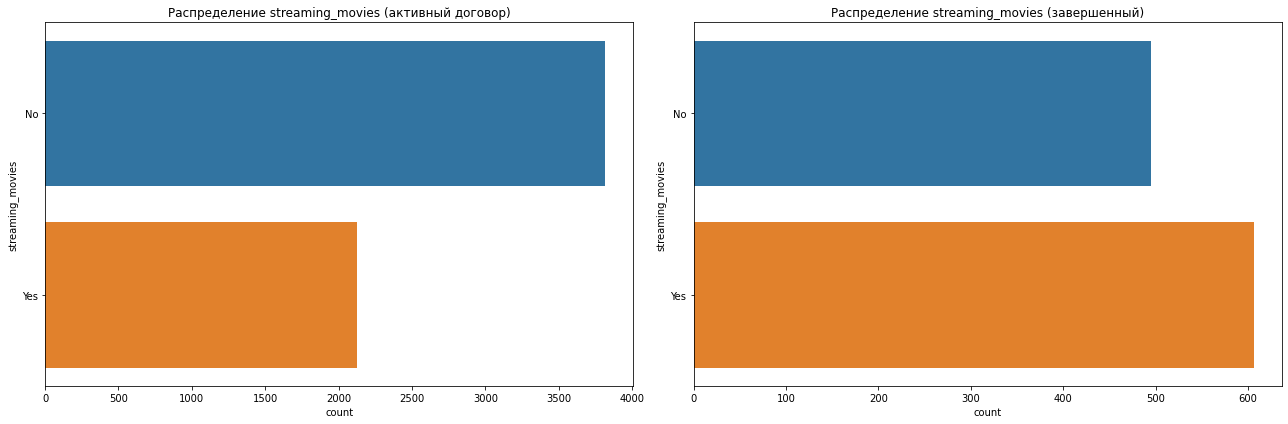

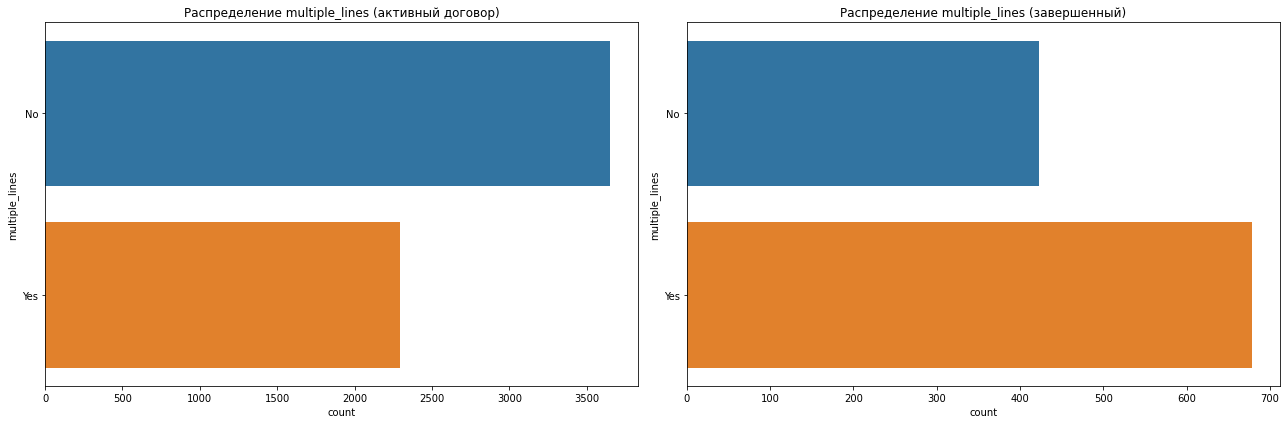

In [55]:
for i in range(len(categorical_col)-1):
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0].set_title(f'Распределение {categorical_col[i]} (активный договор)')
    ax[1].set_title(f'Распределение {categorical_col[i]} (завершенный)')
    
    sns.countplot(data = data_0, y = data_0[categorical_col[i]], ax=ax[0])
    sns.countplot(data = data_1, y = data_1[categorical_col[i]], ax=ax[1])
    fig.tight_layout()


    plt.show()

Для численных признаков:

In [56]:
num_col = data[['monthly_charges', 'total_charges', 'usage_time']].columns

In [57]:
data['usage_time'] = data['usage_time'].astype('int')

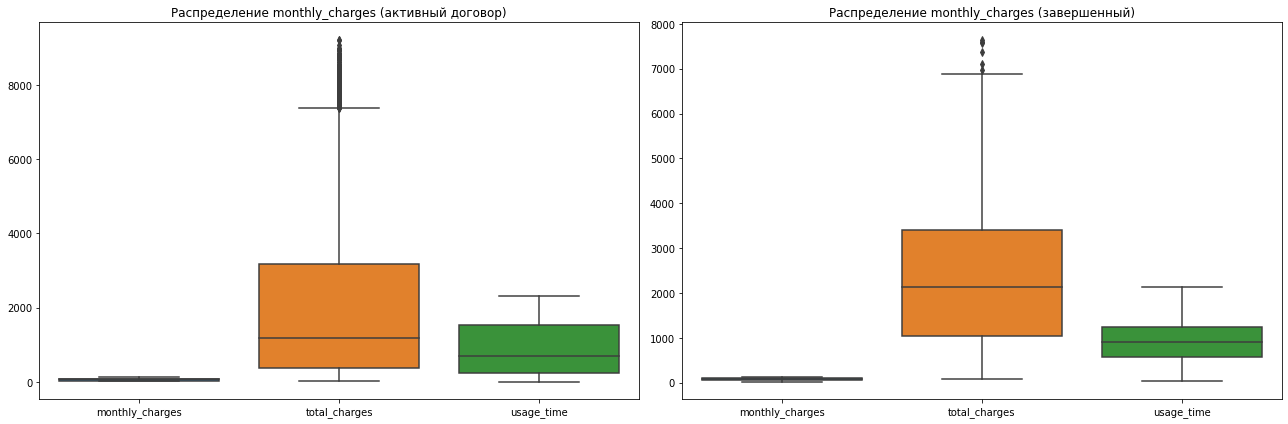

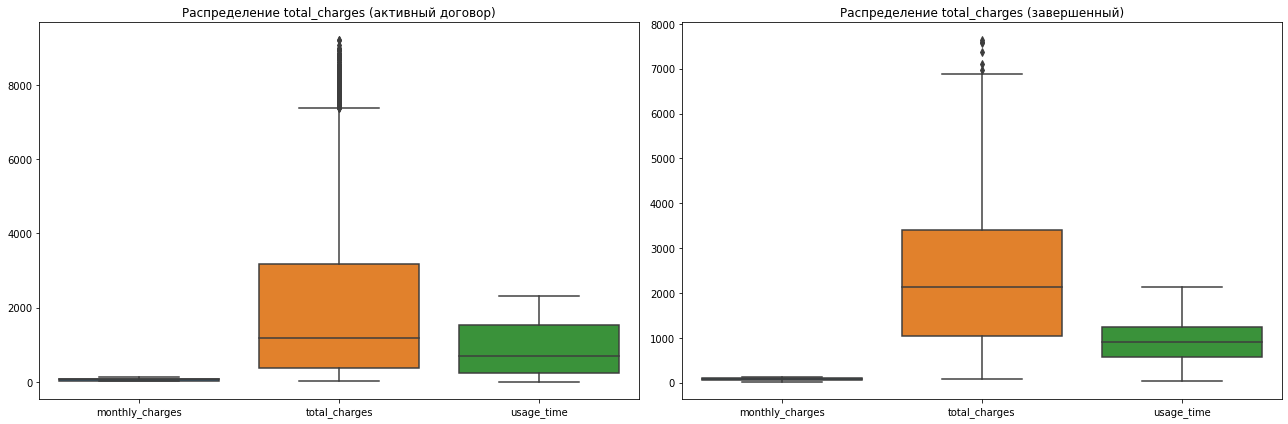

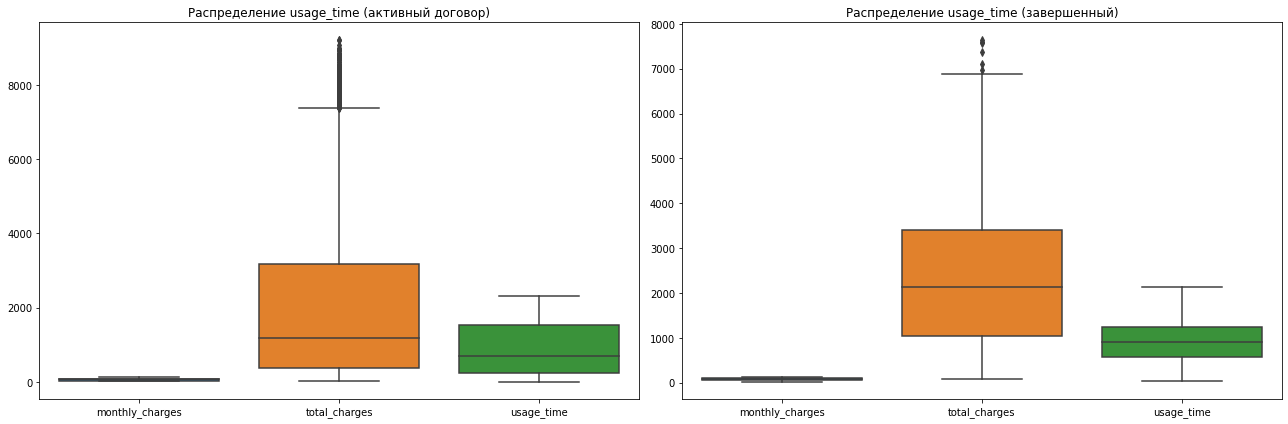

In [58]:
for i in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0].set_title(f'Распределение {i} (активный договор)')
    ax[1].set_title(f'Распределение {i} (завершенный)')
    
    sns.boxplot(data = data_0[num_col], ax = ax[0])
    sns.boxplot(data = data_1[num_col], ax = ax[1])
    
    fig.tight_layout()
    
    plt.show()

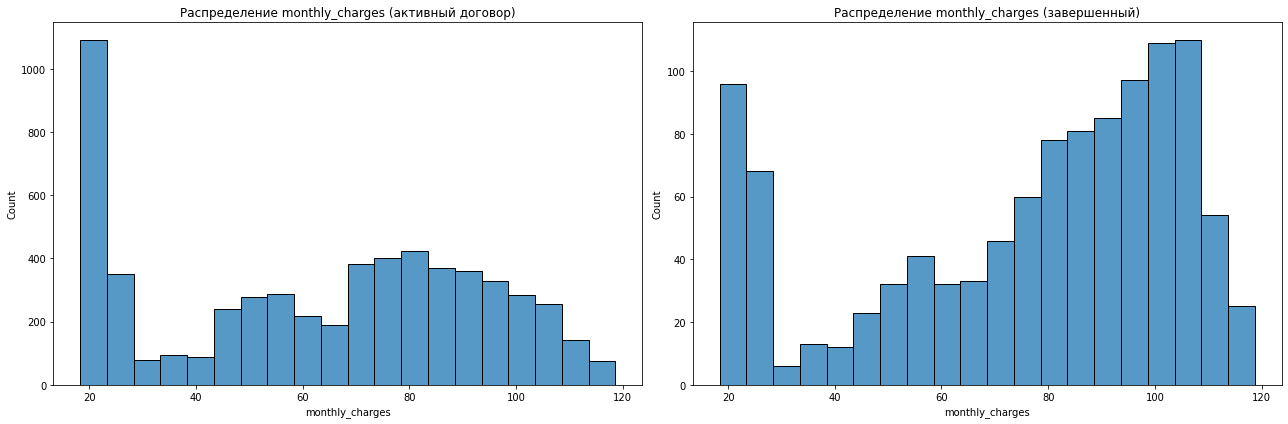

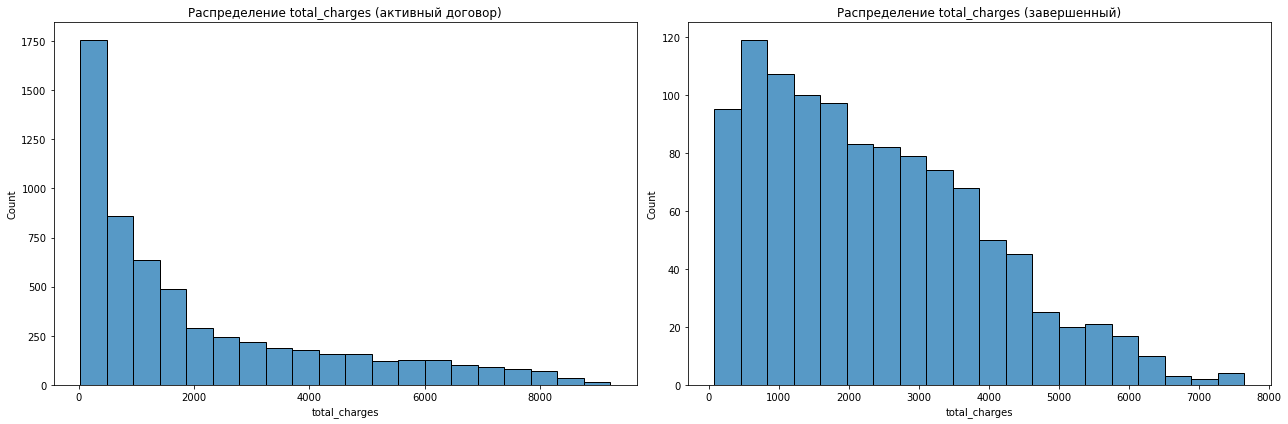

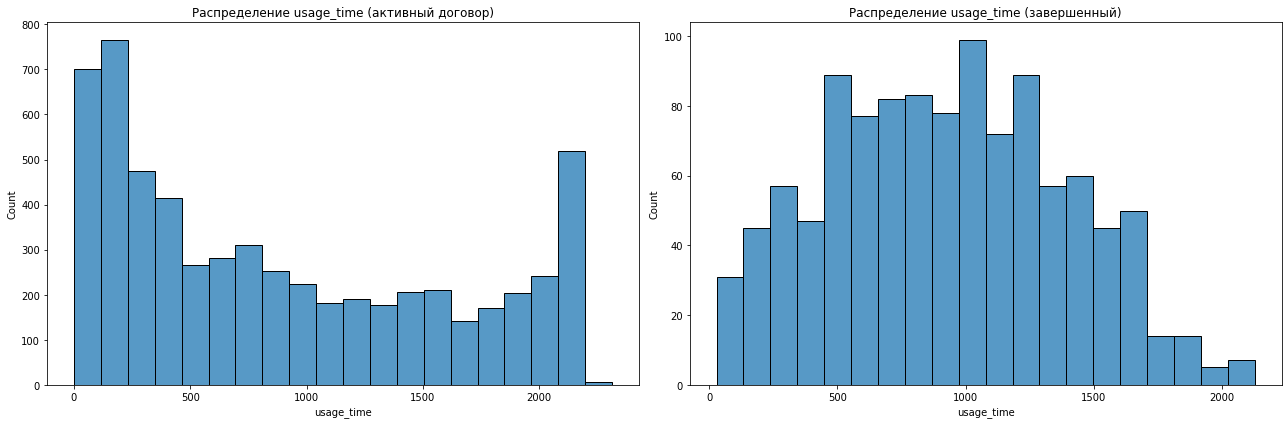

In [59]:
for i in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    ax[0].set_title(f'Распределение {i} (активный договор)')
    ax[1].set_title(f'Распределение {i} (завершенный)')
    
    sns.histplot(data = data_0[i], bins=20, ax=ax[0])
    sns.histplot(data = data_1[i], bins=20, ax=ax[1])

    fig.tight_layout()
    
    plt.show()

interval columns not set, guessing: ['monthly_charges', 'senior_citizen', 'target', 'usage_time']


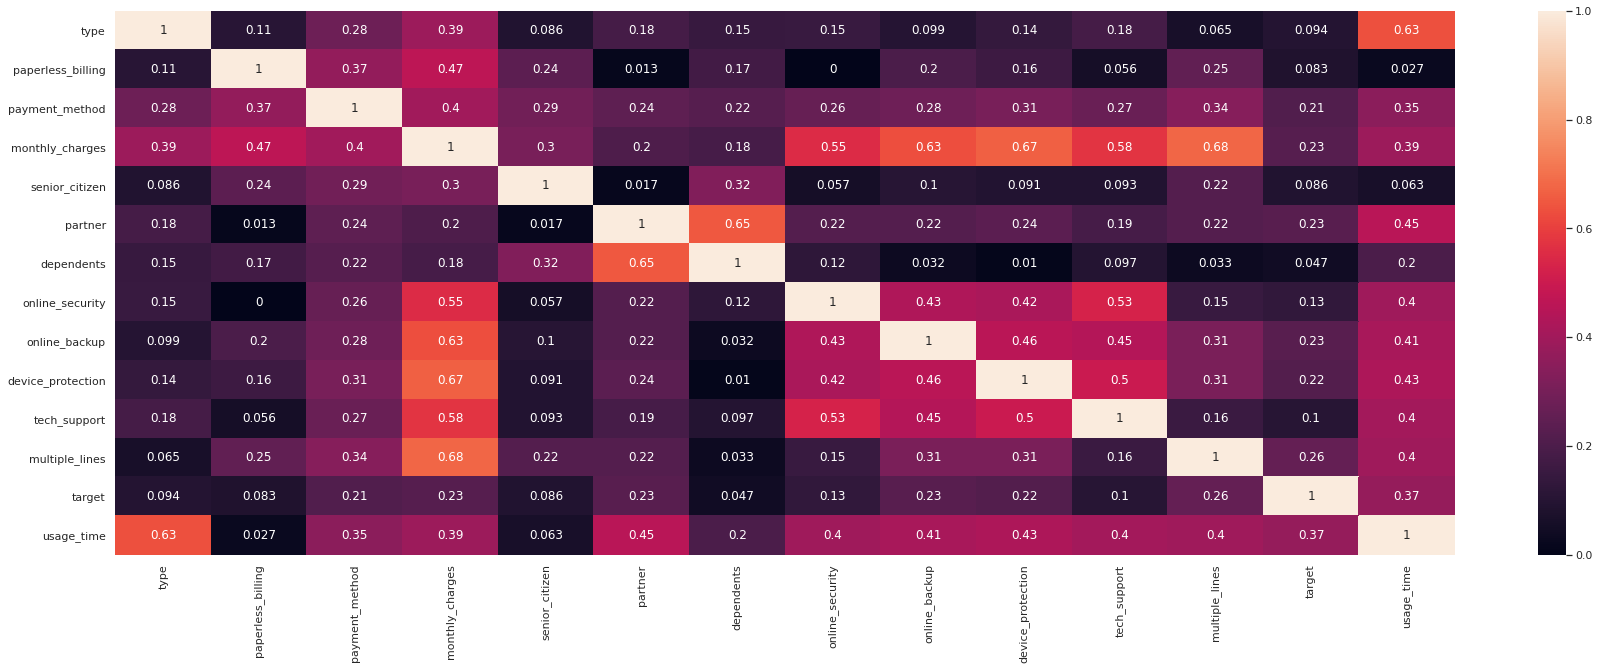

In [79]:
sns.heatmap(data.phik_matrix(), annot=True)
sns.set(rc={'figure.figsize':(30,10)})

Как можно заметить, столбцы "internet_service", "streaming_t_v", "streaming_movies" сильно коррелируют со столбцом "monthly_charges", а значит их следует убрать.

Также, наблюдается сильная корреляция между "total_charges" и "usage_time", а значит столбец "total_charges" нужно удалить.

In [61]:
data = data.drop(columns=['internet_service',  'streaming_t_v', 'streaming_movies', 'total_charges'])

### Вывод по разделу 2

Клиенты, которое продолжают пользоваться услугами компании предпочитают оплачивать услуги компании ежемесячно и с помощью электронной оплаты, когда как предпочтения клиентов, которые расторгли договор с компанией, распределились примерно одинаково между 3-мя способами: картой, переводом из банка, электронным способом. Способ отпраки чека по почте мало распространен среди как бывших, так и действующих клиентов. У клиентов, которые расторгли договор, чаще ни кого не было на иждивении, а также у них чаще были подключены различные дополнительные услуги.

Стоит отметить, что в данных наблюдается сильный дисбаланс классов, что может повлиять на обучение модели. При создании модели, будем использовать внутреннюю балансировку классов.

## Подготовка данных к обучению модели

### Разбиение на выборки

In [62]:
target = data['target']
features = data.drop(['target'], axis=1)

RANDOM_STATE = 280823

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, \
                                                                            random_state=RANDOM_STATE)

### Кодирование

In [64]:
features_train

,type,paperless_billing,payment_method,monthly_charges,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,multiple_lines,usage_time
3633,Month-to-month,Yes,Electronic check,71.25,1,No,No,No,No,No,No,No,31
4718,One year,Yes,Mailed check,20.00,0,Yes,No,No,No,No,No,No,610
1246,Month-to-month,Yes,Electronic check,105.15,0,Yes,Yes,Yes,Yes,No,No,Yes,1371
3155,One year,No,Mailed check,19.85,0,No,Yes,No,No,No,No,No,883
4974,Month-to-month,Yes,Mailed check,36.85,0,No,No,No,Yes,No,Yes,No,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,One year,Yes,Bank transfer (automatic),103.25,0,No,No,No,Yes,Yes,No,Yes,1127
1343,One year,Yes,Credit card (automatic),73.05,0,Yes,Yes,Yes,No,Yes,No,No,1949
2312,One year,No,Mailed check,20.10,0,No,No,No,No,No,No,No,549
5788,Month-to-month,Yes,Electronic check,25.15,0,Yes,No,No,No,No,No,No,123


In [65]:
categorical_col = features_train.drop(columns=['monthly_charges', 'usage_time']).columns

In [66]:
ohe_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
ohe_train = features_train
ohe_encoder.fit(ohe_train[categorical_col])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [67]:
ohe_train[
    ohe_encoder.get_feature_names_out()
] = ohe_encoder.transform(ohe_train[categorical_col])

#удаляем незакодированные категориальные признаки (изначальные колонки)
ohe_train = ohe_train.drop(categorical_col, axis=1)

In [68]:
ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 3633 to 112
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         5282 non-null   float64
 1   usage_time                              5282 non-null   int64  
 2   type_One year                           5282 non-null   float64
 3   type_Two year                           5282 non-null   float64
 4   paperless_billing_Yes                   5282 non-null   float64
 5   payment_method_Credit card (automatic)  5282 non-null   float64
 6   payment_method_Electronic check         5282 non-null   float64
 7   payment_method_Mailed check             5282 non-null   float64
 8   senior_citizen_1                        5282 non-null   float64
 9   partner_Yes                             5282 non-null   float64
 10  dependents_Yes                          5282 non-null   fl

In [69]:
ohe_test = features_test
ohe_test[
    ohe_encoder.get_feature_names_out()
] = ohe_encoder.transform(ohe_test[categorical_col])

#удаляем незакодированные категориальные признаки (изначальные колонки)
ohe_test = ohe_test.drop(categorical_col, axis=1)

In [70]:
ohe_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 5386 to 2229
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         1761 non-null   float64
 1   usage_time                              1761 non-null   int64  
 2   type_One year                           1761 non-null   float64
 3   type_Two year                           1761 non-null   float64
 4   paperless_billing_Yes                   1761 non-null   float64
 5   payment_method_Credit card (automatic)  1761 non-null   float64
 6   payment_method_Electronic check         1761 non-null   float64
 7   payment_method_Mailed check             1761 non-null   float64
 8   senior_citizen_1                        1761 non-null   float64
 9   partner_Yes                             1761 non-null   float64
 10  dependents_Yes                          1761 non-null   f

## Обучение моделей

### Обучение RandomForestClassifier

In [71]:
%%time 
r_forest_model = RandomForestClassifier()
r_forest_params = {'model__class_weight': ['balanced'],
                    'model__criterion': ['gini'],
                    'model__max_depth': [2, 6, 10],
                    'model__n_estimators': [50,75,100, 150, 200], 
                    'model__n_jobs': [-1], 
                    'model__random_state': [RANDOM_STATE]}


scaler = StandardScaler()
pipe = Pipeline(steps=[('scaler', scaler), ('model', r_forest_model)])


RCV = RandomizedSearchCV(estimator=pipe, param_distributions=r_forest_params, 
                        cv=5, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_STATE)

RCV.fit(ohe_train, target_train)
    
print('Модель с лучшими гиперпараметрами:', RCV.best_estimator_)
print('ROC-AUC на тренировочной выборке:', RCV.best_score_)
print(RCV.best_params_)

Модель с лучшими гиперпараметрами: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=280823))])
ROC-AUC на тренировочной выборке: 0.8271267880372084
{'model__random_state': 280823, 'model__n_jobs': -1, 'model__n_estimators': 200, 'model__max_depth': 6, 'model__criterion': 'gini', 'model__class_weight': 'balanced'}
CPU times: user 20.1 s, sys: 161 ms, total: 20.3 s
Wall time: 20.3 s


### Обучение LogisticRegression

In [72]:
%%time 
LR = LogisticRegression()

LR_param = {'model__class_weight': ['balanced'], 
             'model__solver': ['liblinear', 'lbfgs'],
             'model__random_state': [RANDOM_STATE]}


scaler = StandardScaler()
pipe = Pipeline(steps=[('scaler', scaler), ('model', LR)])


RCV = RandomizedSearchCV(estimator=pipe, param_distributions=LR_param, 
                        cv=5, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_STATE)

RCV.fit(ohe_train, target_train)
    
print('Модель с лучшими гиперпараметрами:', RCV.best_estimator_)
print('ROC-AUC на тренировочной выборке:', RCV.best_score_)
print(RCV.best_params_)

Модель с лучшими гиперпараметрами: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced',
                                    random_state=280823, solver='liblinear'))])
ROC-AUC на тренировочной выборке: 0.7574530559436521
{'model__solver': 'liblinear', 'model__random_state': 280823, 'model__class_weight': 'balanced'}
CPU times: user 1.05 s, sys: 1.45 s, total: 2.5 s
Wall time: 2.5 s


### Обучение CatBoostClassifier

In [73]:
%%time 
cat = CatBoostClassifier()

cat_param = {'model__iterations': [500], 
             'model__depth': [3, 6, 8, 10], 'model__learning_rate': [.1, .5, .01], 
             'model__loss_function': ['Logloss', 'CrossEntropy'],
             'model__eval_metric': ['AUC'],
             'model__random_state': [RANDOM_STATE],
             'model__verbose' : [500]}


scaler = StandardScaler()
pipe = Pipeline(steps=[('scaler', scaler), ('model', cat)])


RCV = RandomizedSearchCV(estimator=pipe, param_distributions=cat_param, 
                        cv=5, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_STATE)

RCV.fit(ohe_train, target_train)
    
print('Модель с лучшими гиперпараметрами:', RCV.best_estimator_)
print('ROC-AUC на тренировочной выборке:', RCV.best_score_)
print(RCV.best_params_)

0:	total: 63.7ms	remaining: 31.8s
499:	total: 6.85s	remaining: 0us
0:	total: 17.5ms	remaining: 8.75s
499:	total: 7.05s	remaining: 0us
0:	total: 17ms	remaining: 8.48s
499:	total: 7.04s	remaining: 0us
0:	total: 16.5ms	remaining: 8.24s
499:	total: 7.21s	remaining: 0us
0:	total: 16.5ms	remaining: 8.24s
499:	total: 9.08s	remaining: 0us
0:	total: 6.81ms	remaining: 3.4s
499:	total: 2.18s	remaining: 0us
0:	total: 5.59ms	remaining: 2.79s
499:	total: 2.22s	remaining: 0us
0:	total: 5.5ms	remaining: 2.75s
499:	total: 2.17s	remaining: 0us
0:	total: 5.68ms	remaining: 2.83s
499:	total: 2.2s	remaining: 0us
0:	total: 5.5ms	remaining: 2.74s
499:	total: 2.21s	remaining: 0us
0:	total: 1.78ms	remaining: 891ms
499:	total: 482ms	remaining: 0us
0:	total: 1.22ms	remaining: 608ms
499:	total: 484ms	remaining: 0us
0:	total: 1.49ms	remaining: 743ms
499:	total: 490ms	remaining: 0us
0:	total: 1.14ms	remaining: 568ms
499:	total: 486ms	remaining: 0us
0:	total: 1.25ms	remaining: 626ms
499:	total: 481ms	remaining: 0us
0

### Вывод по разделу 4

Лучший показатель AUC-ROC метрики имеет модель CatBoostClassifier = 0.9156. Именно эту модель будем тестировать

## Тестирование и выводы

### Тестирование

In [74]:
cat = CatBoostClassifier(learning_rate = 0.1, eval_metric = 'AUC', iterations = 500, depth = 3, \
                         loss_function = 'Logloss', random_state=RANDOM_STATE)

In [75]:
cat.fit(ohe_train, target_train, verbose=500)

0:	total: 1.25ms	remaining: 623ms
499:	total: 624ms	remaining: 0us


In [76]:
predictions = cat.predict_proba(ohe_test)[:, 1]

In [77]:
print(roc_auc_score(target_test, predictions))

0.9177103057562174


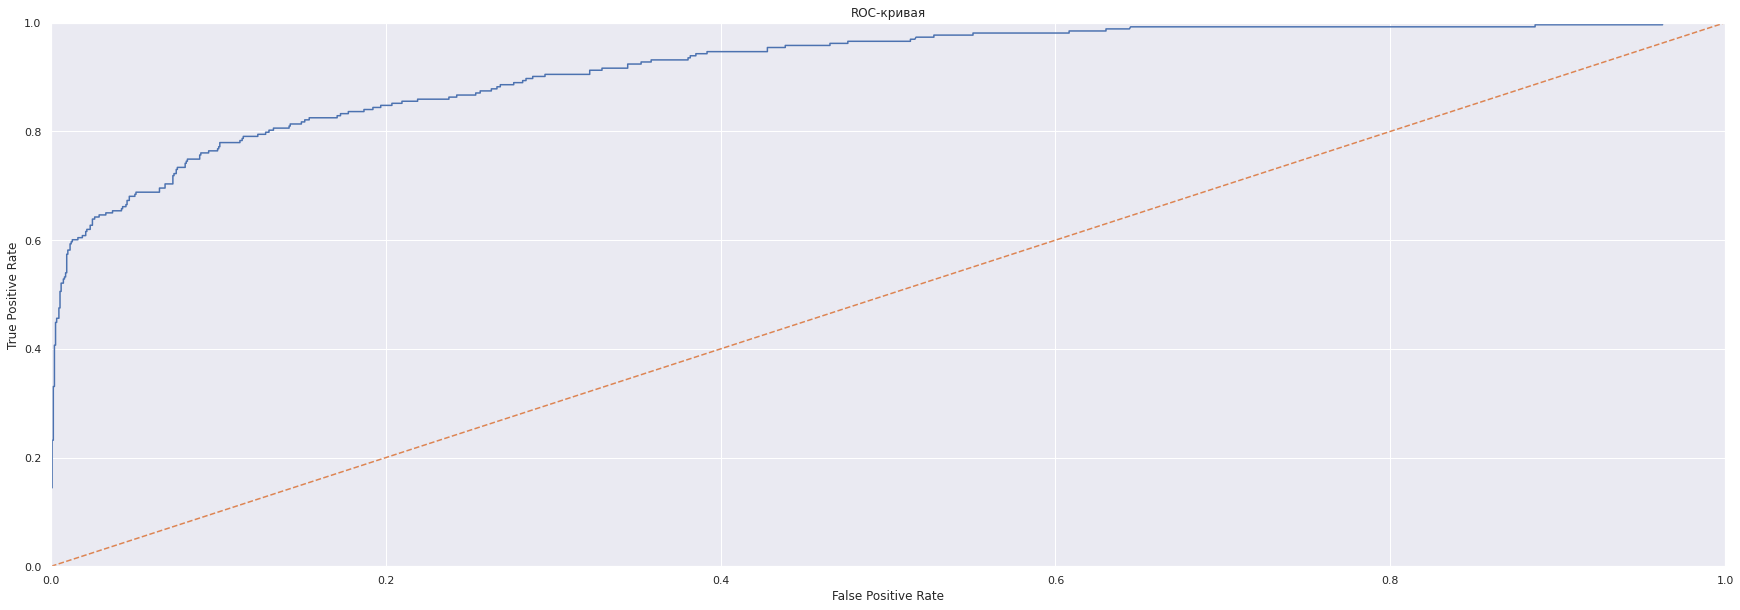

In [78]:
probabilities_one_valid = predictions

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')


plt.show()

### Отчет

В ходе работы были выполненны следующие пункты:

* Предобработка данных (объединены таблицы, приведены некоторые столбцы к нужному типу данных, удалены пропуски, 
    удалены явные дубликаты, выделен целевой признак)
    
    
* Исследование данных (проанализированны данные, построены графики)


* Подготовка к обучению модели (Датафрейм был разбит на тренировочную и тестовую выборки, закодированны данные)


* Обучение моделей (обучены 3 разные модели на подготовленных данных, использована кросс-валидация для оценки качества    
    модели)
    
    
* Тестирование и выводы (протестирована лучшая модель на тестовой выборке)

Для обучения моделей мы использовали следующие признаки: 

    Категоральные:
    type,
    paperless_billing, 
    payment_method,
    senior_citizen,
    partner,
    dependents,
    online_security,
    online_backup,
    device_protection,
    tech_support,
    multiple_lines,
    
    Числовые:
    monthly_charges,
    usage_time

    (Числовые признаки были в последствии закодированы с помощью OneHotEncoder)

В качестве целевого признака был взят 'target', которые мы получили в результате преобразования исходного датасета, \
в котором еще находились такие признаки, как: 'BeginDate' и 'EndDate'. 'target' = 1, если клиент еще не расторг договор     
о предоставлении услуг с компанией, а 0 соответственно, если расторг

В результате всех этих действий, мы получили модель со значением AUC-ROC метрики равной: 0.9177. 

Лучшей оказалась: CatBoostClassifier, с гиперпараметрами: 

* learning_rate = 0.1


* eval_metric = 'AUC'


* iterations = 500 


* depth = 3 


* loss_function = 'Logloss'

'random_state' на всех этапах был зафиксирован на значении: 280823

Модель подходит для прогназирования оттока клиентов компанией "Ниединогоразрыва.ком". 


Отличий от исходного плана не было. Трудностей в ходе работы не возникло. Каждый этап работы был важным

